Number of NDVI files found: 36


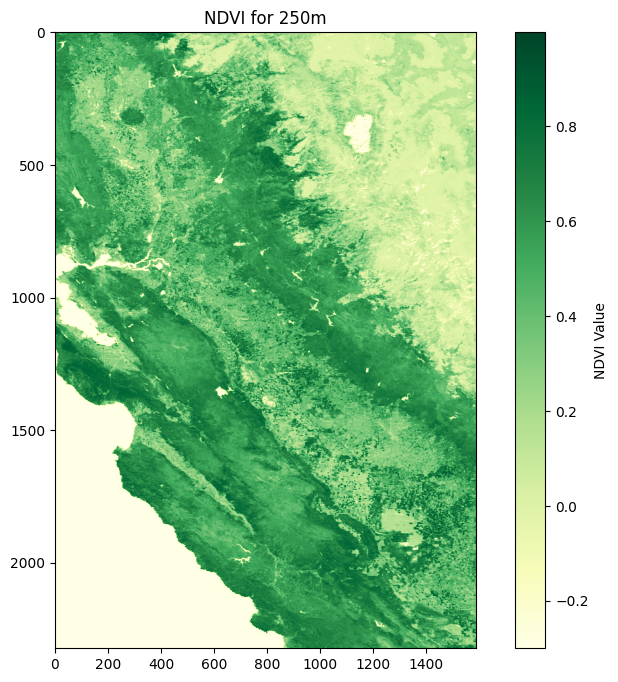

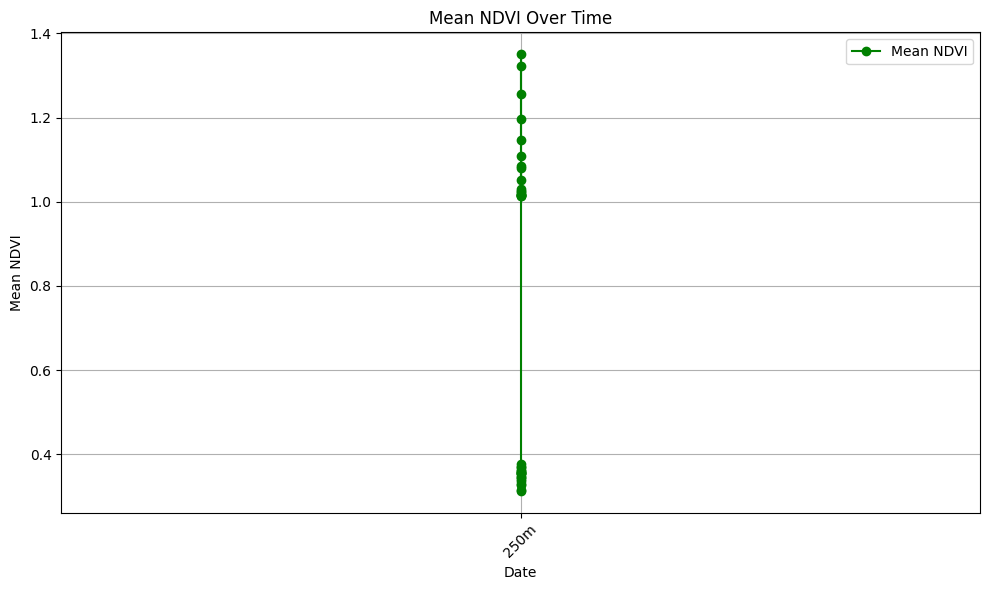

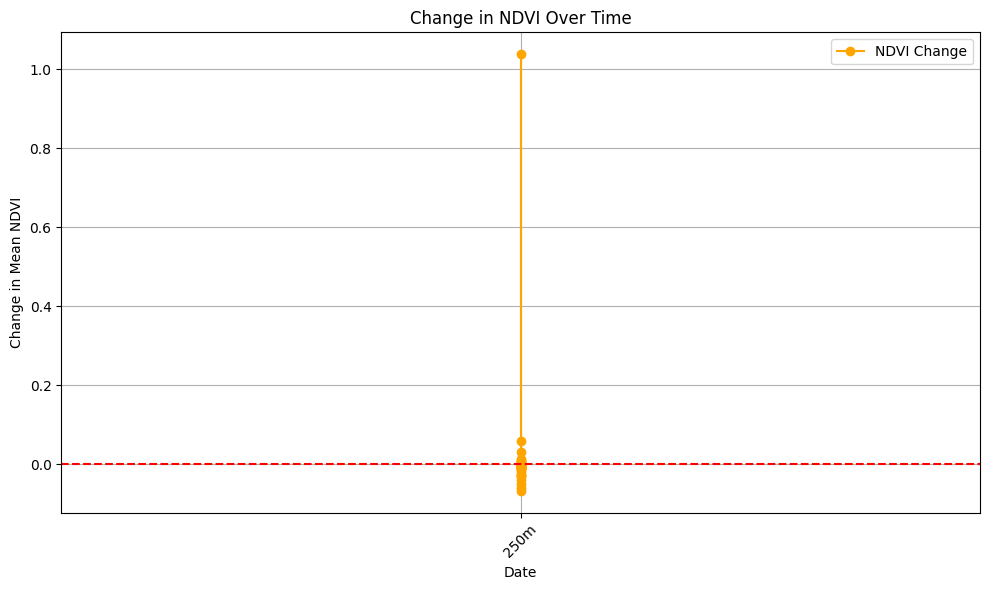

Overall Mean NDVI (rescaled): 0.7231
Overall Standard Deviation of NDVI (rescaled): 0.3830


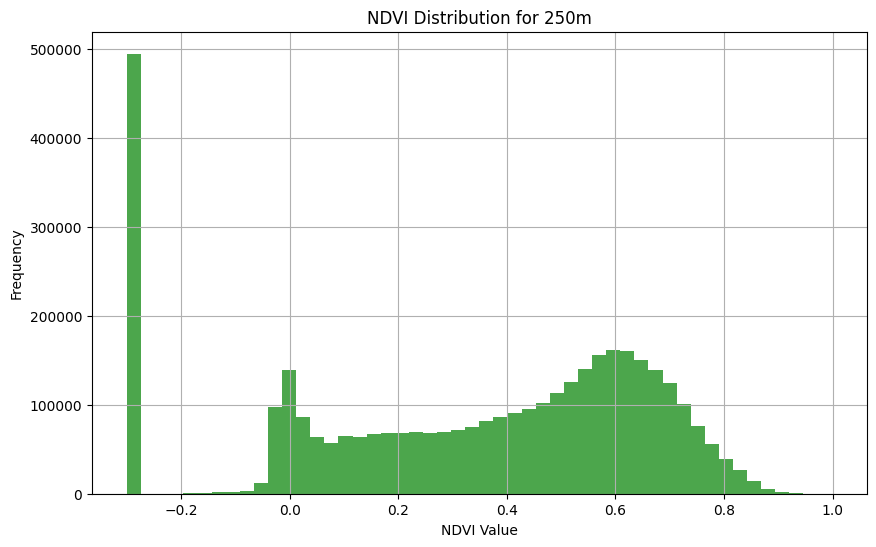

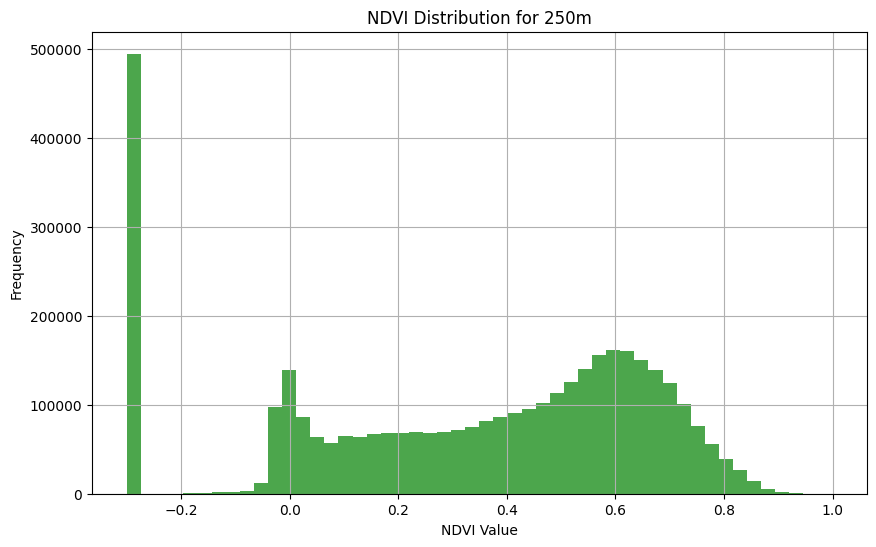

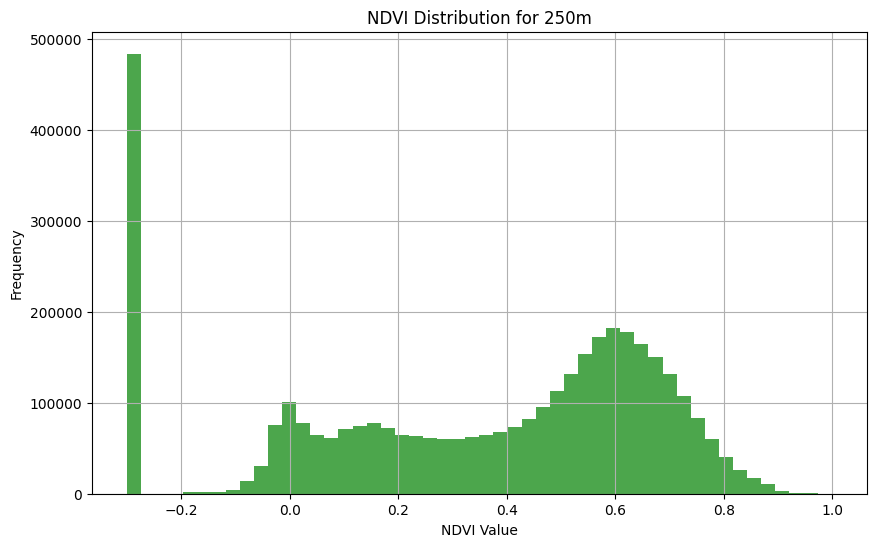

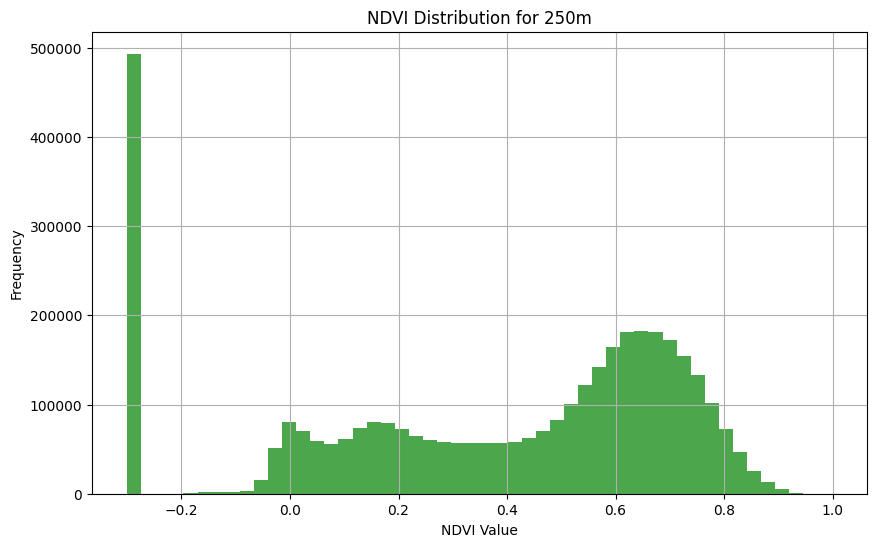

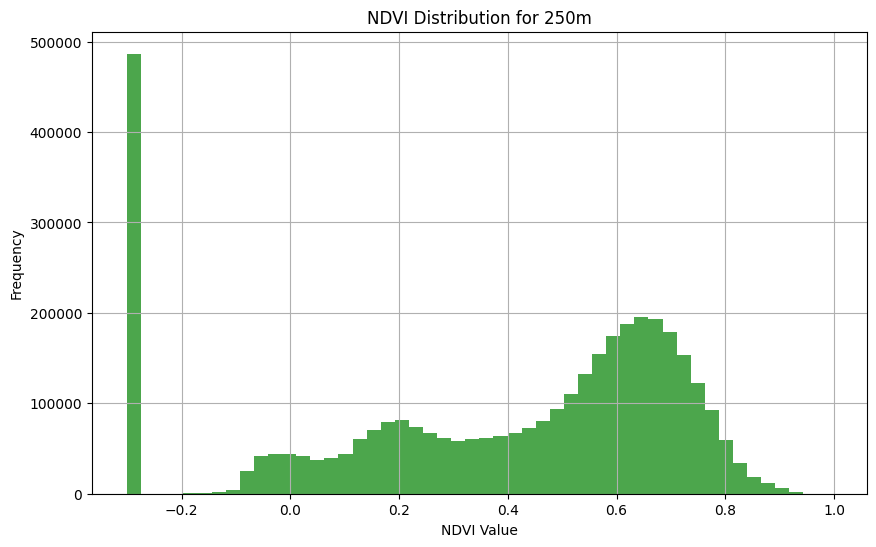

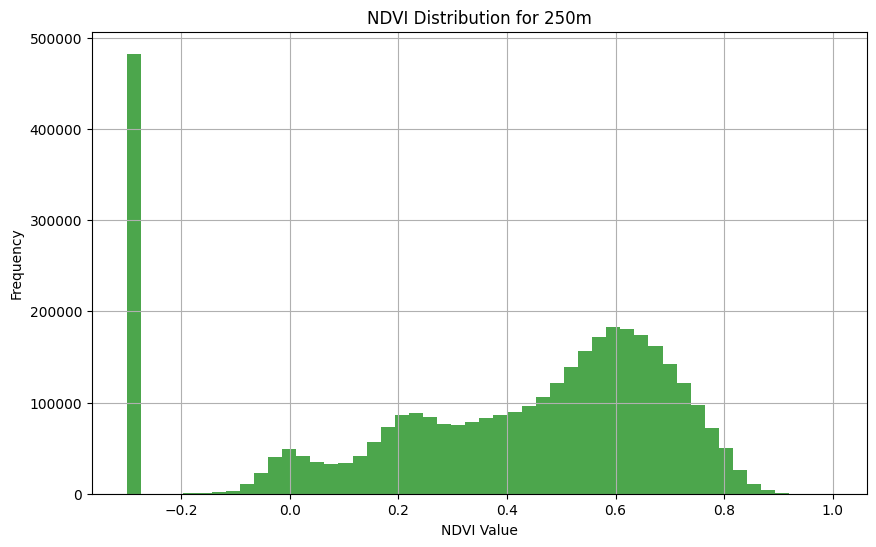

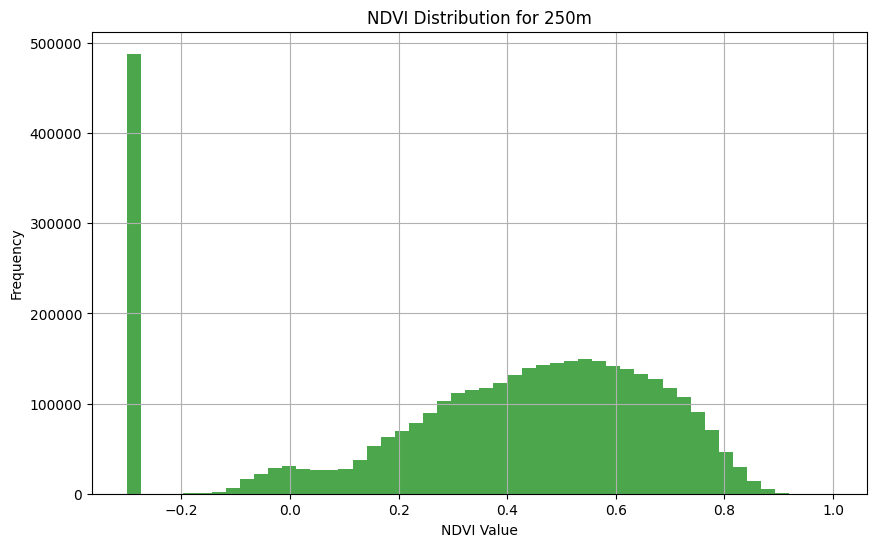

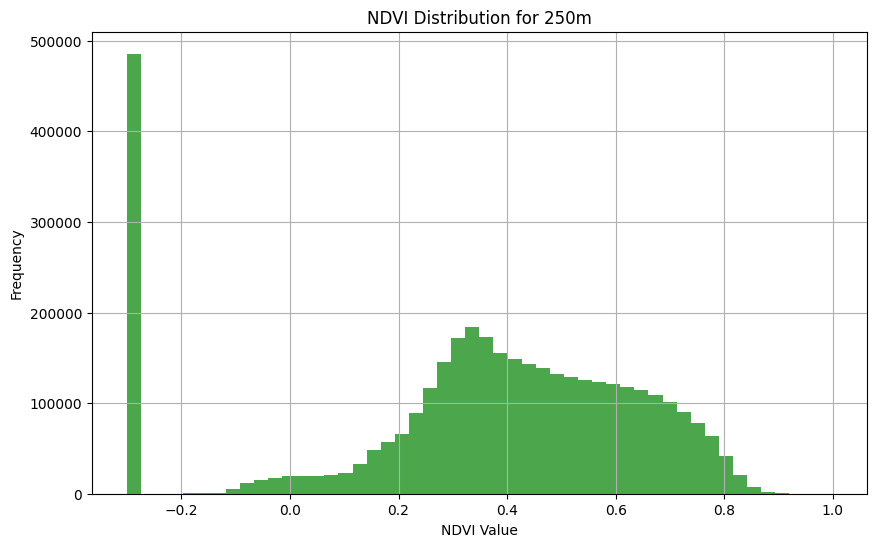

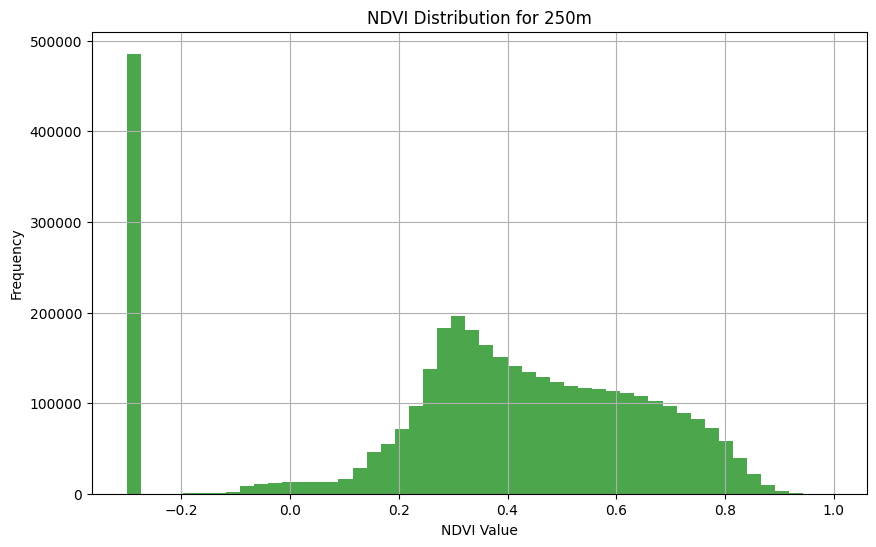

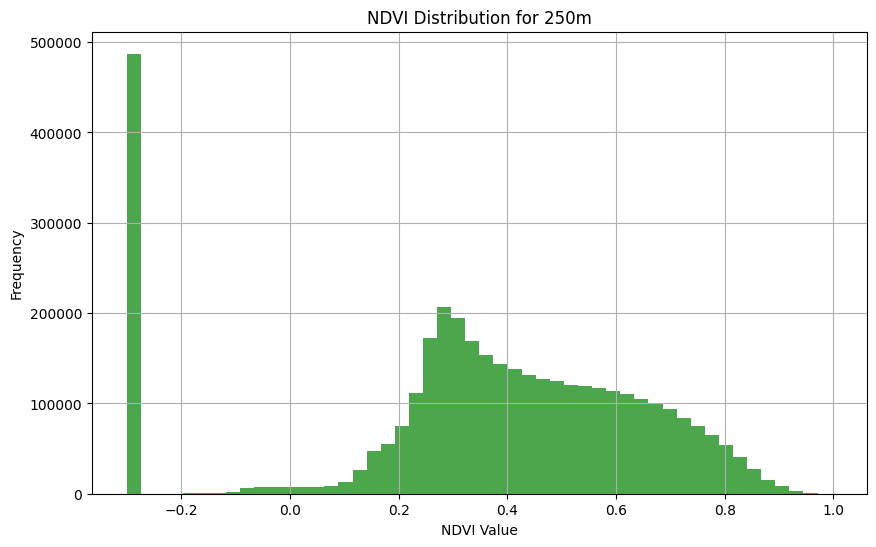

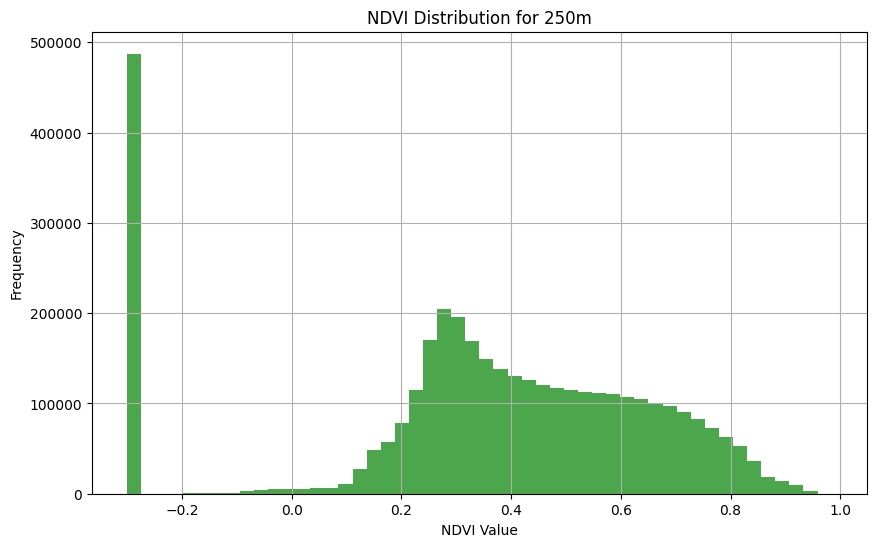

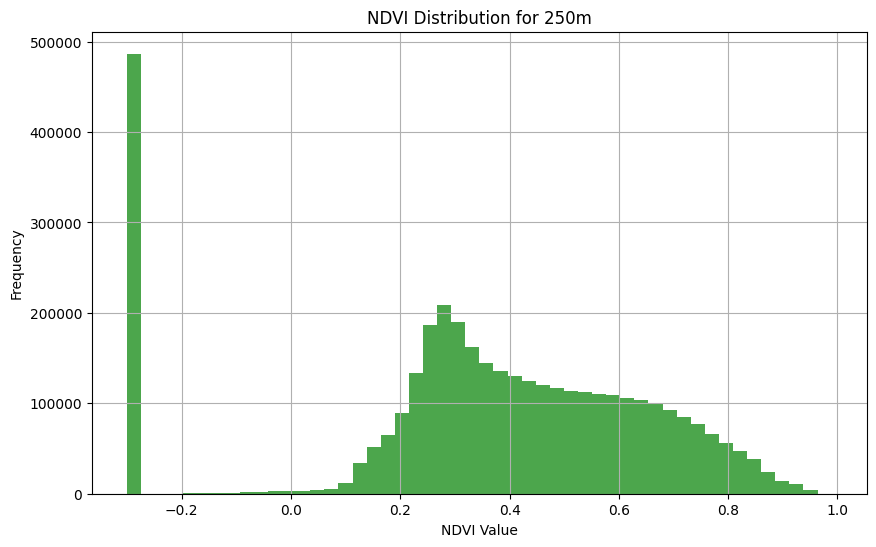

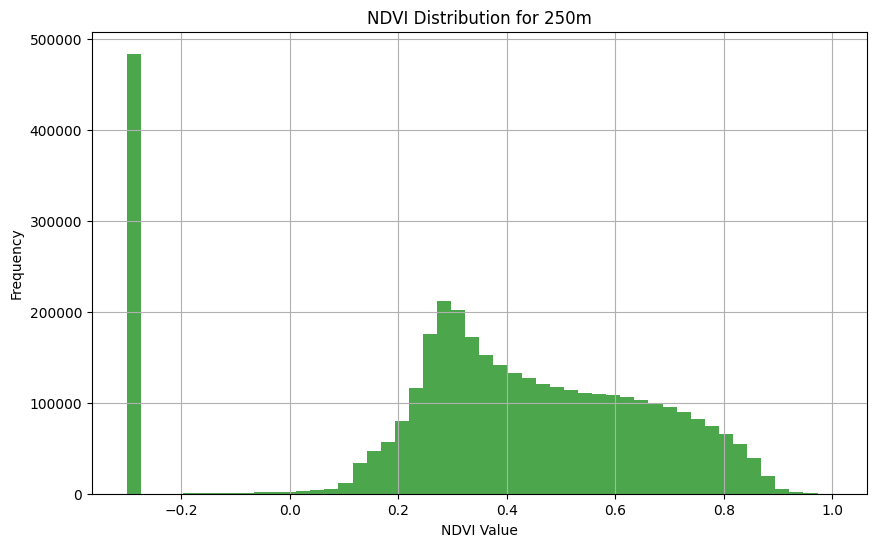

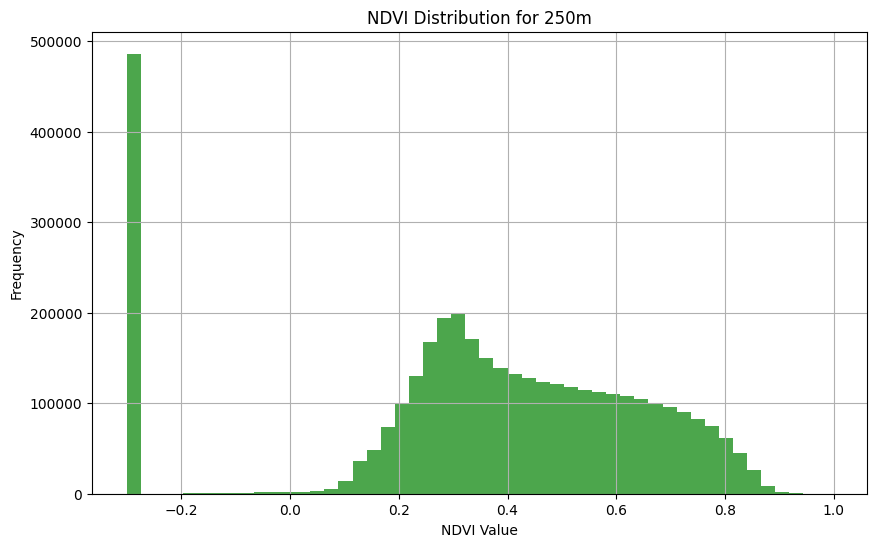

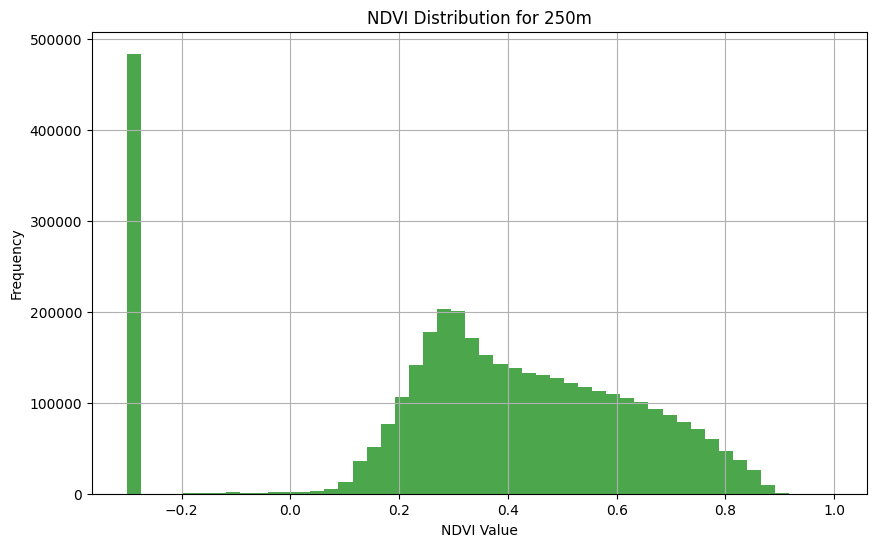

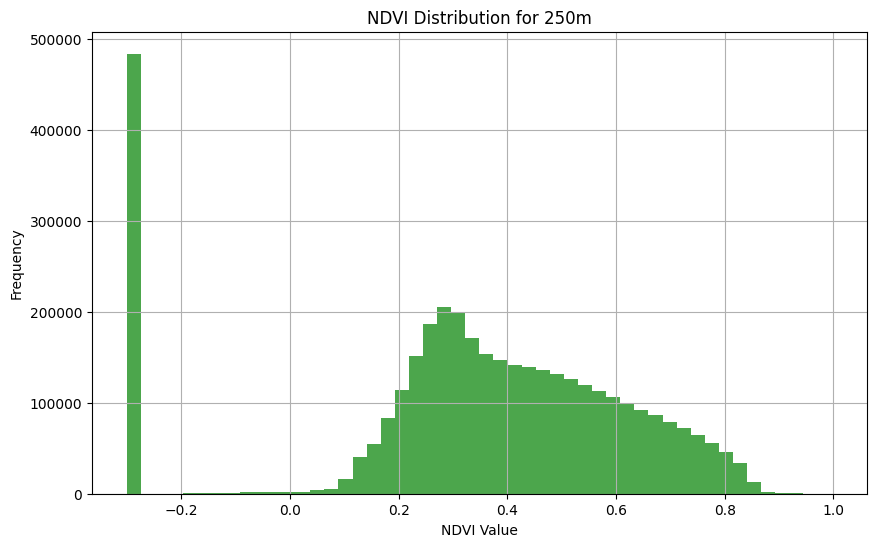

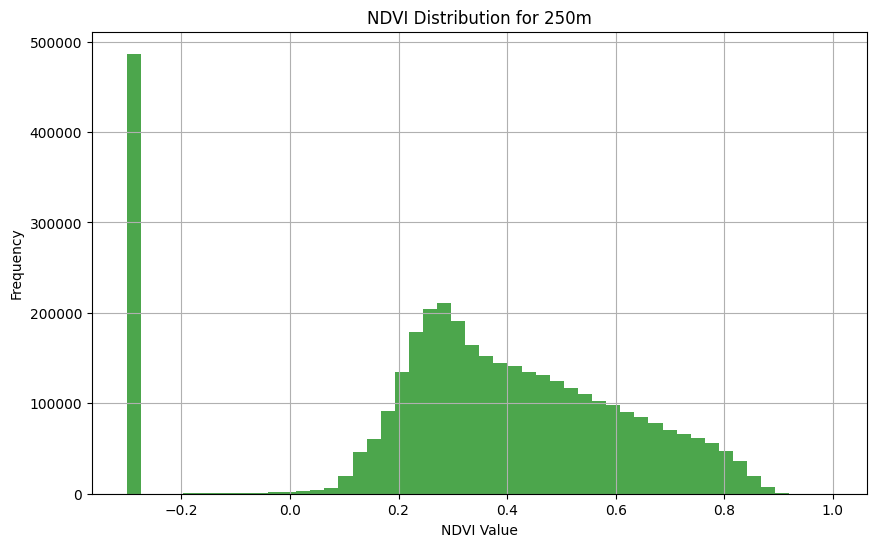

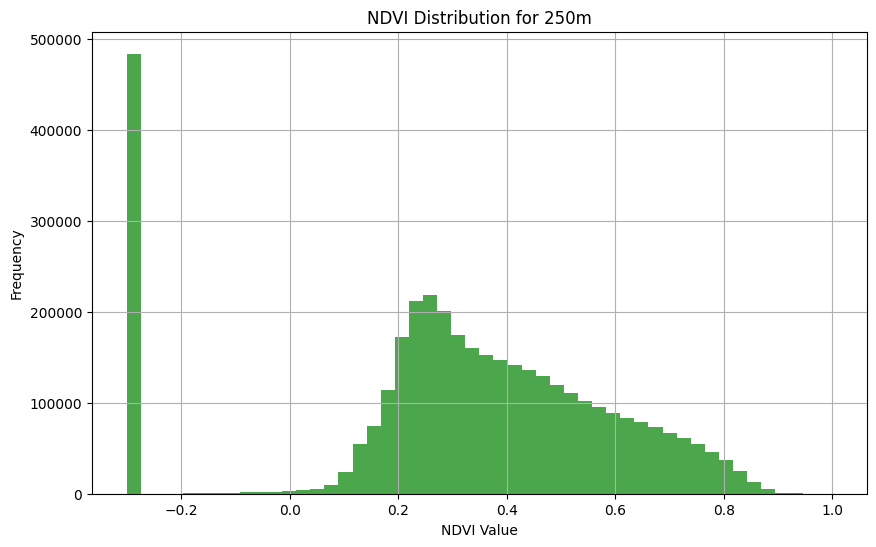

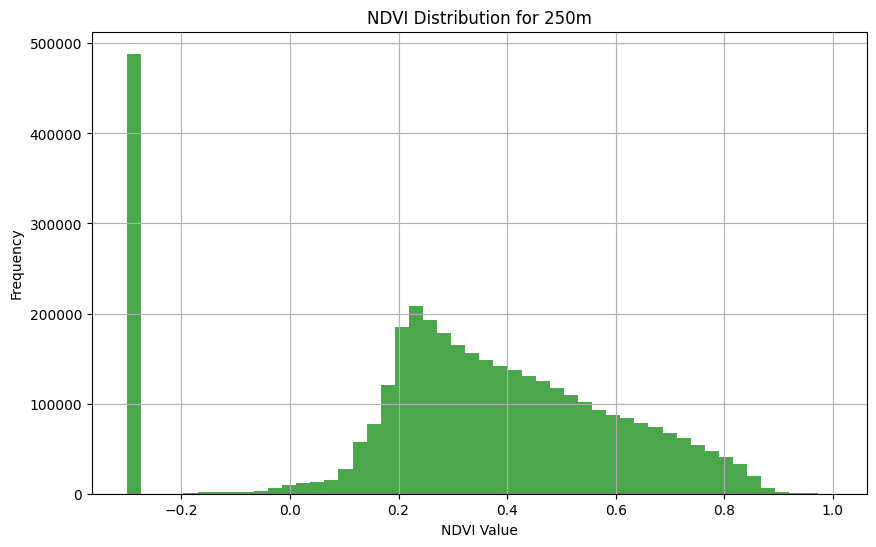

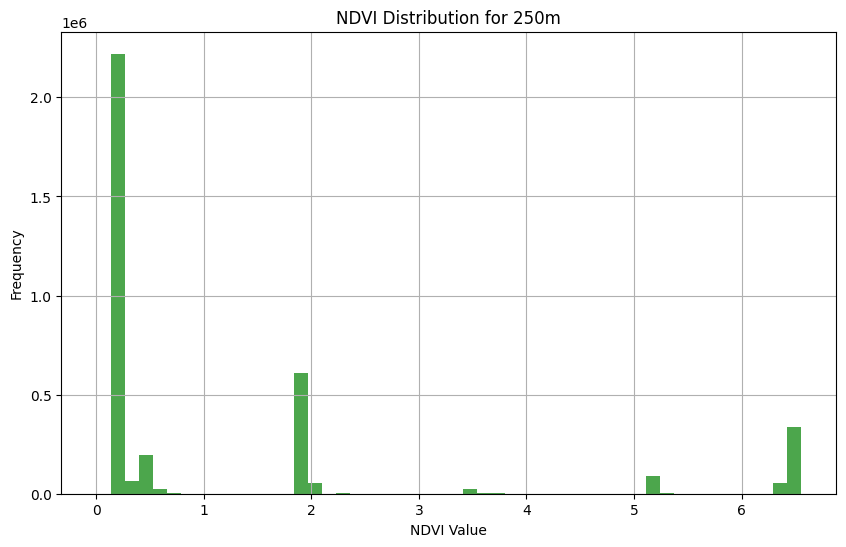

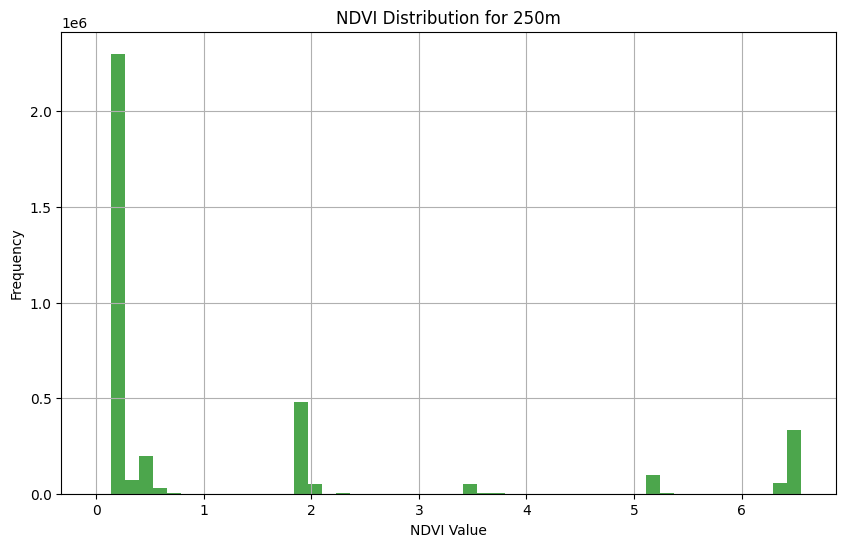

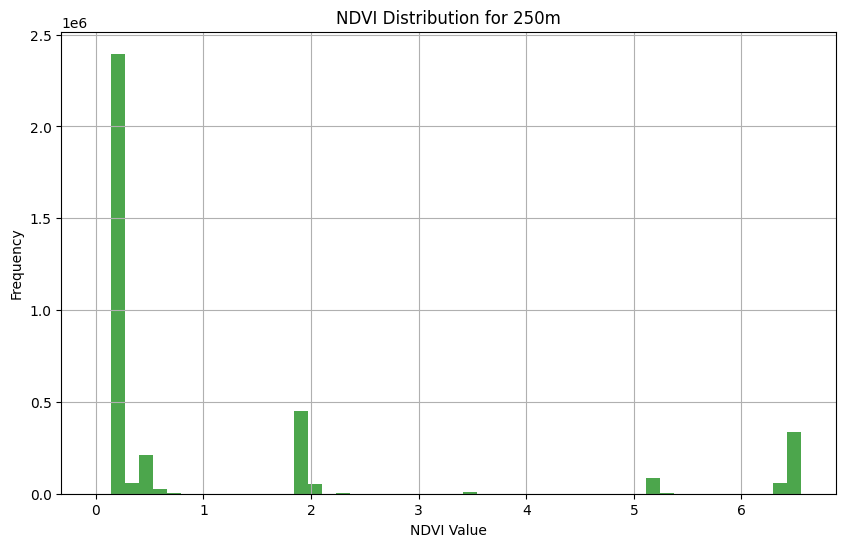

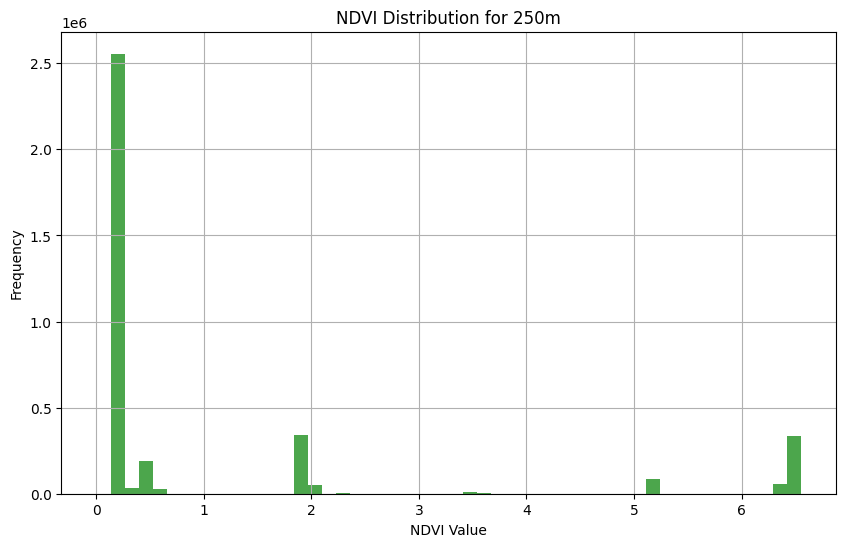

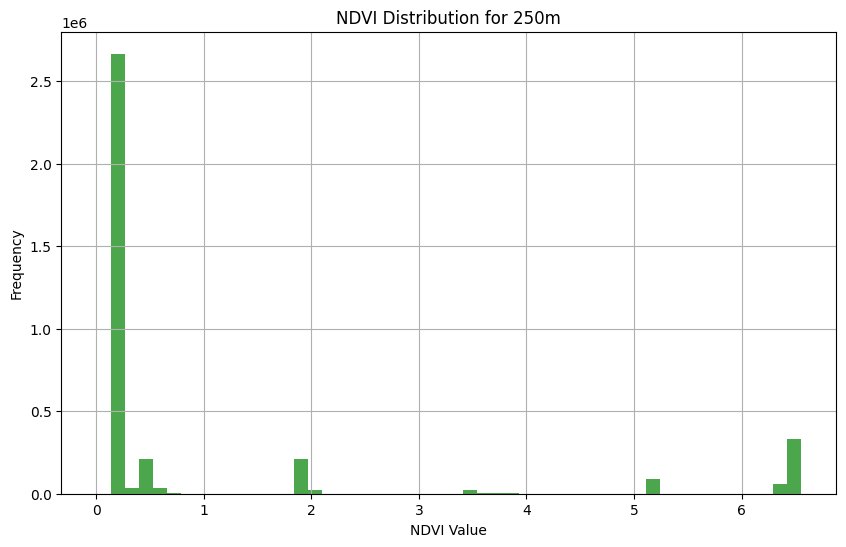

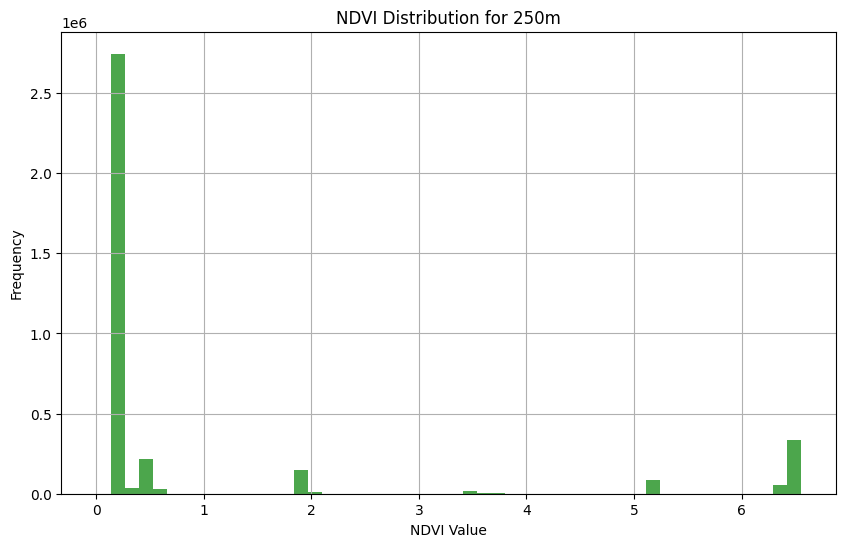

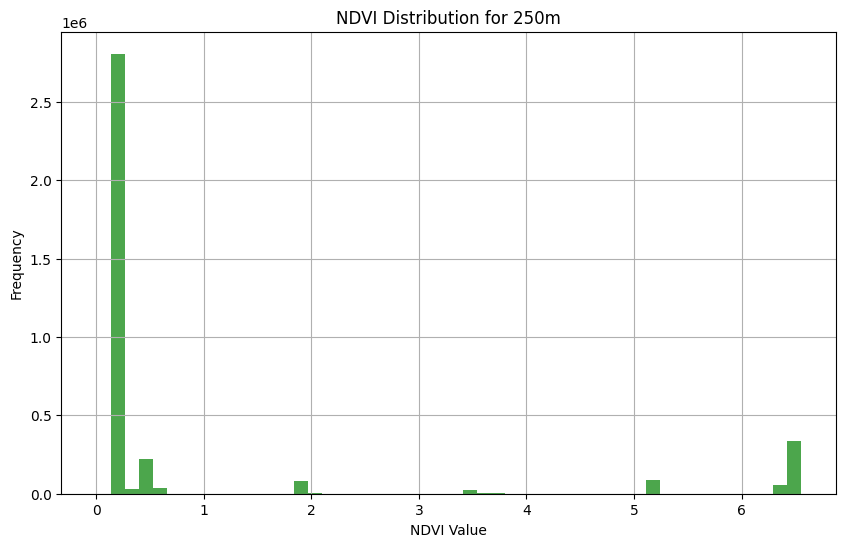

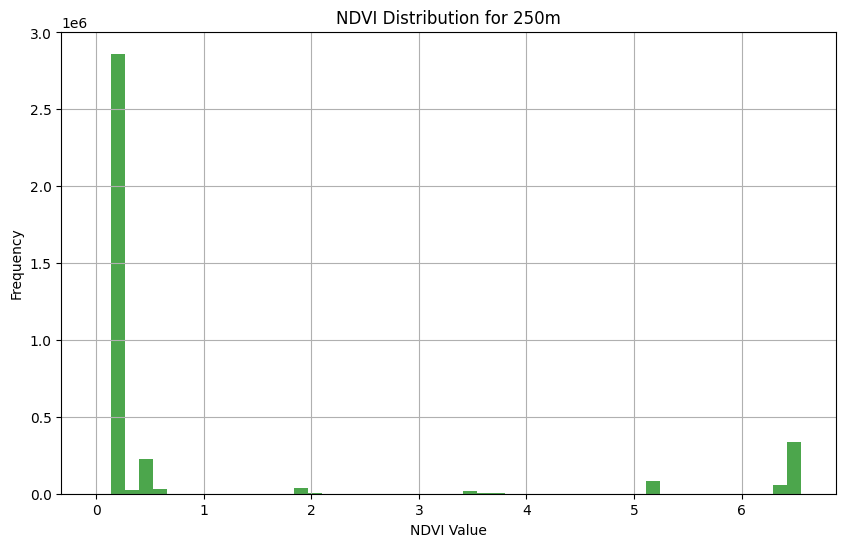

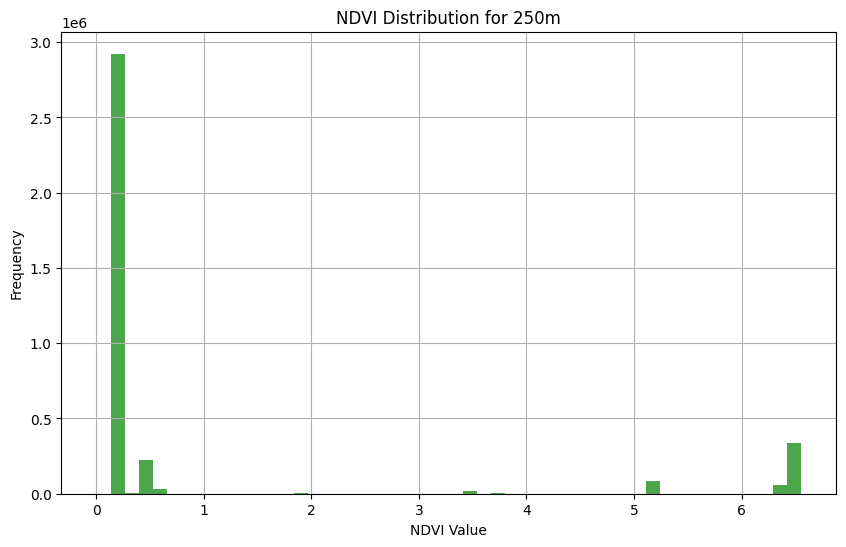

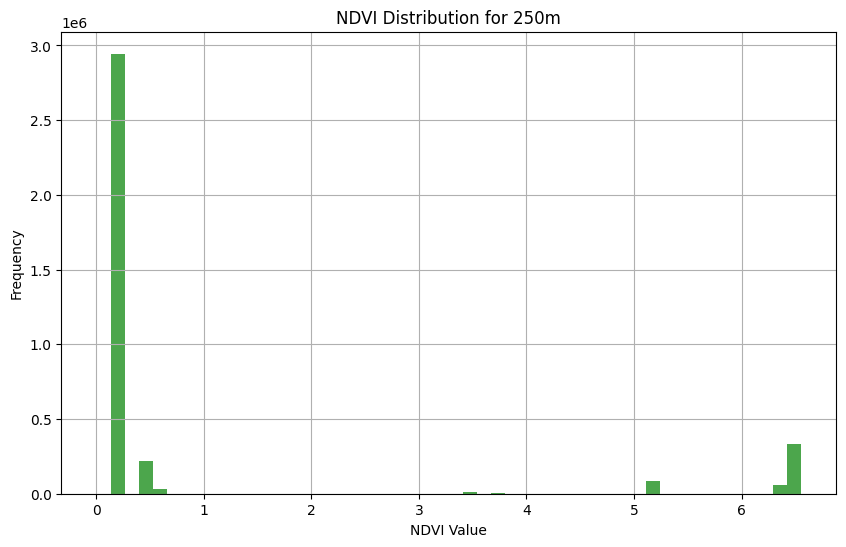

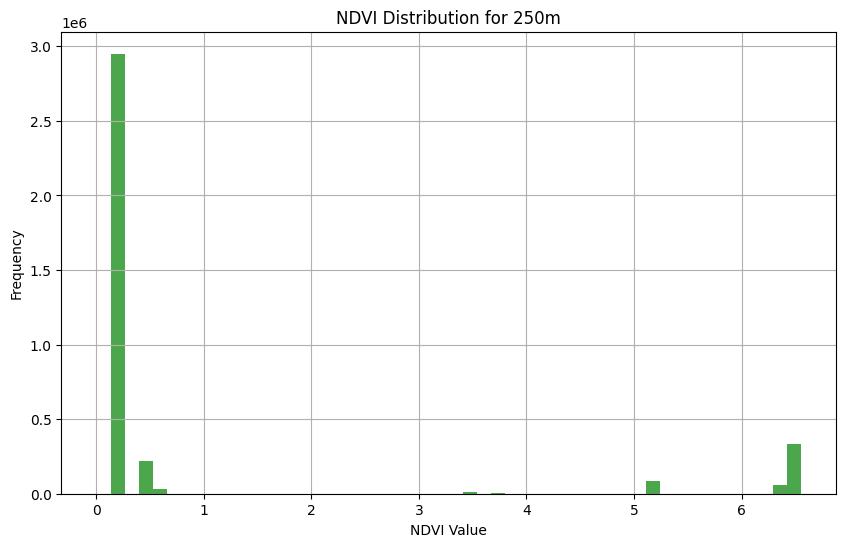

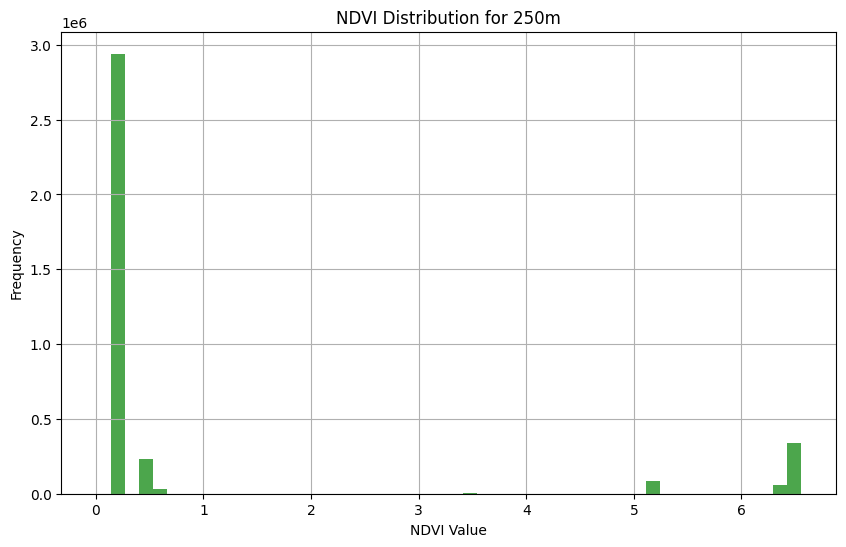

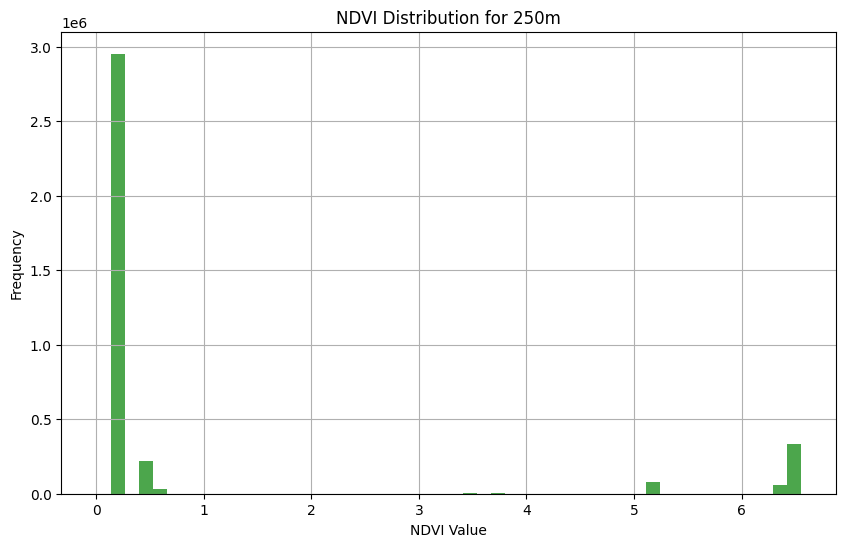

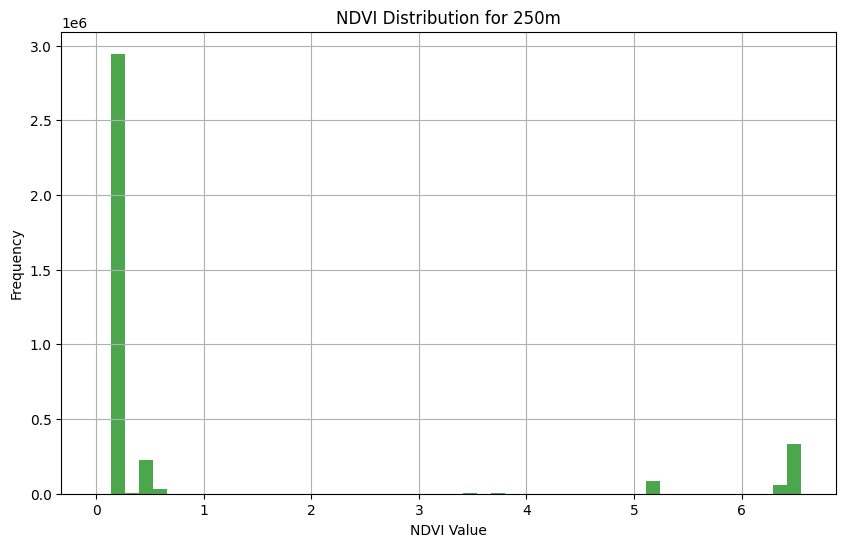

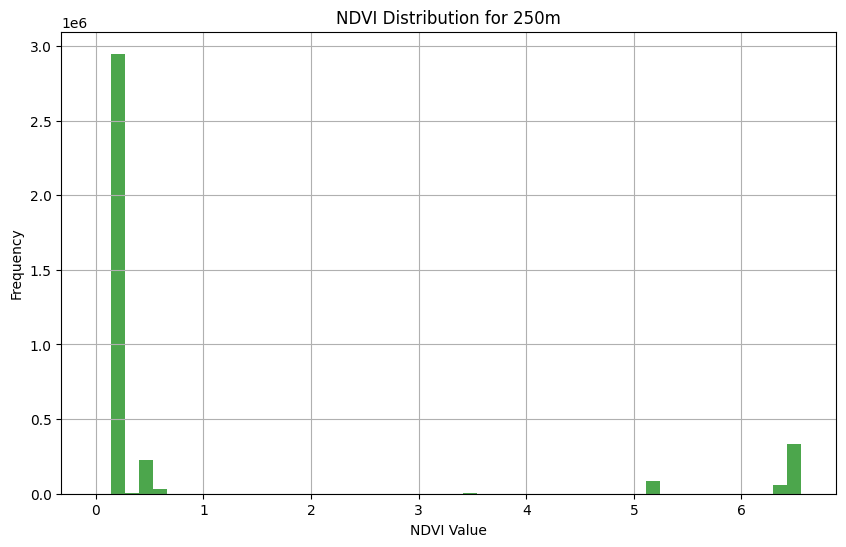

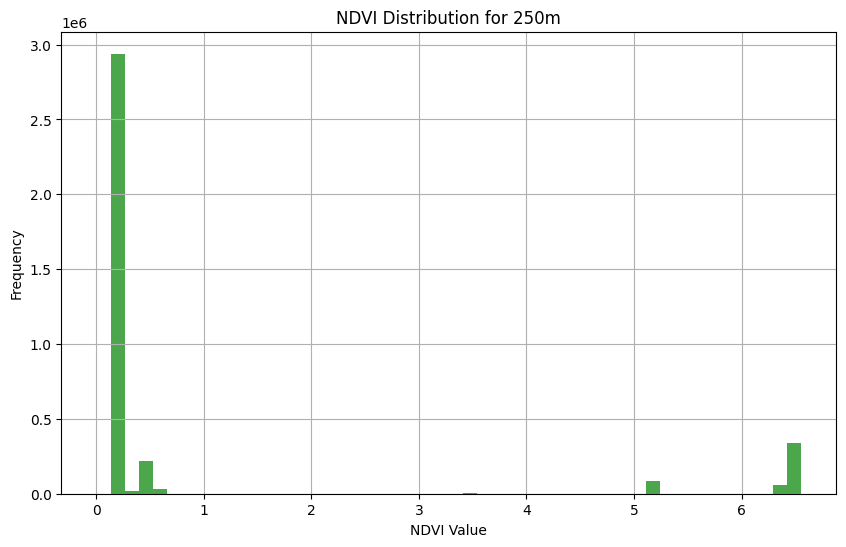

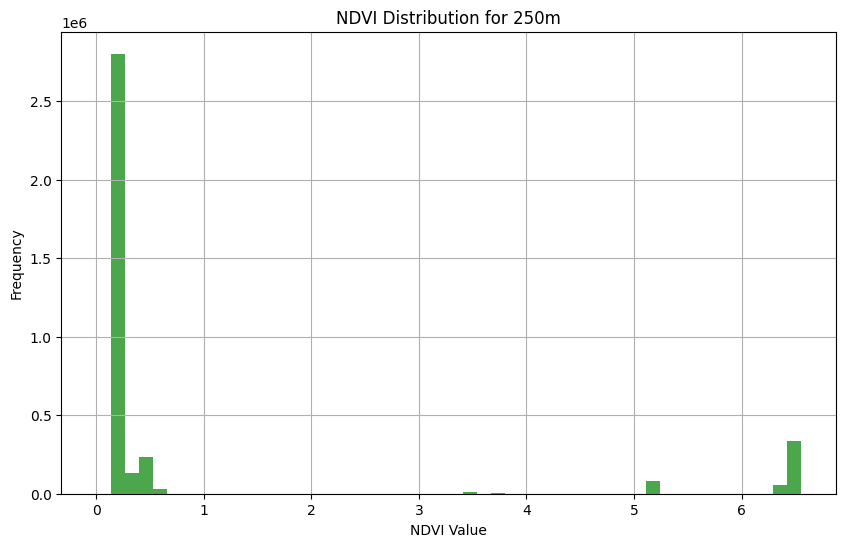

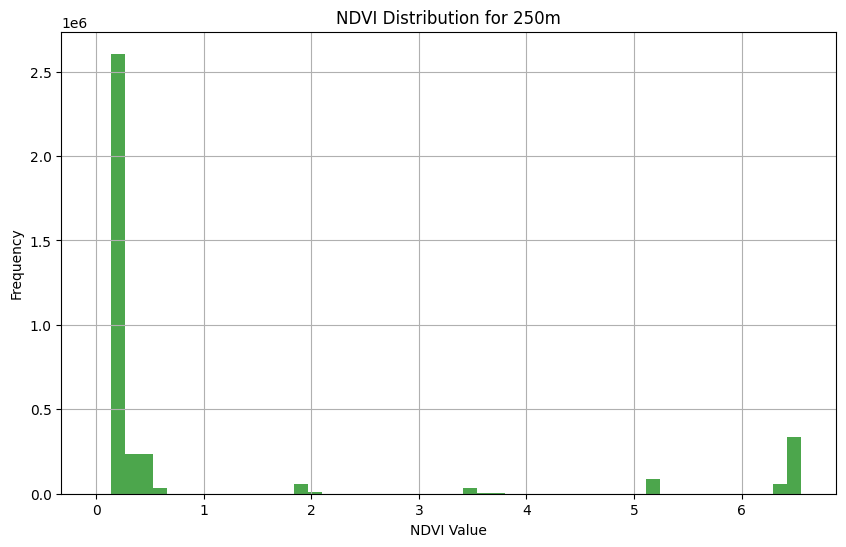

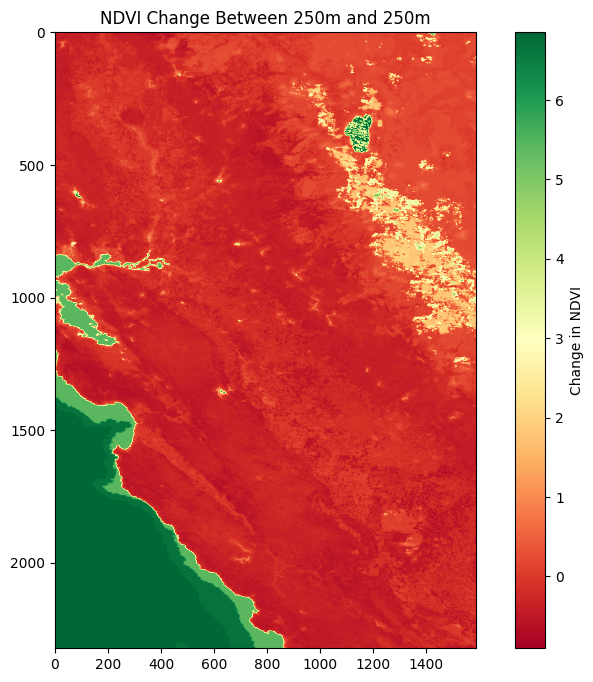

Mean Change in NDVI between 250m and 250m: 0.7580


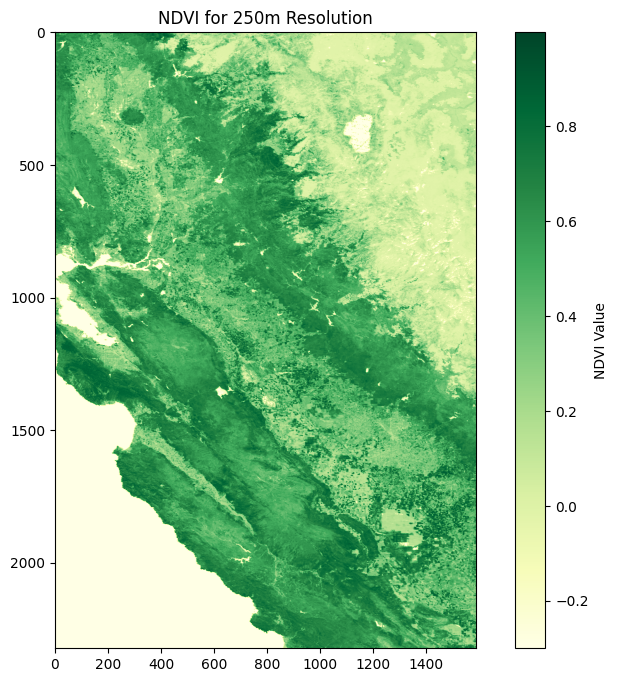

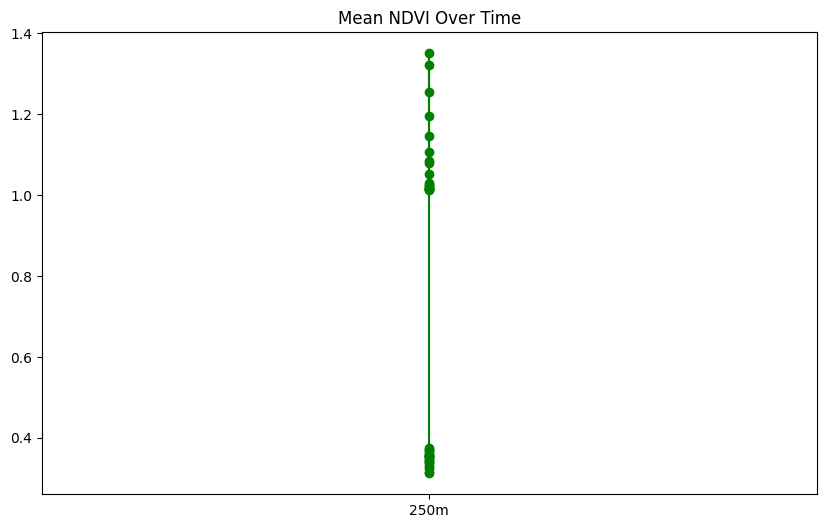

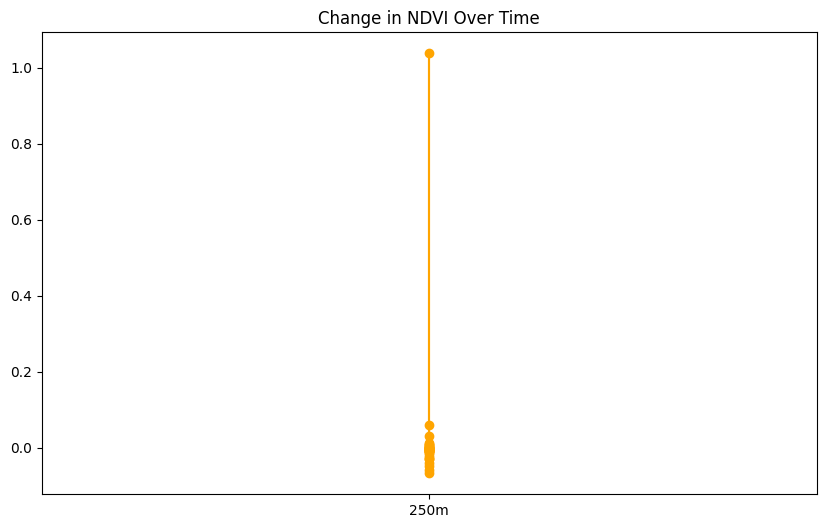

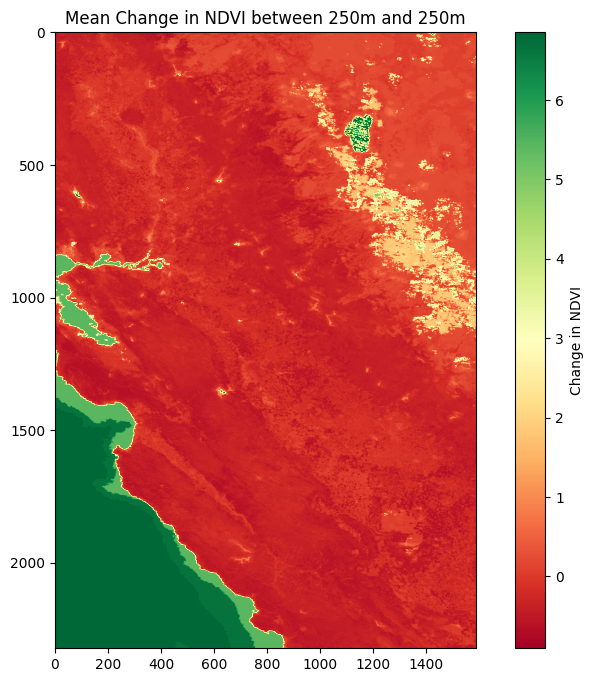

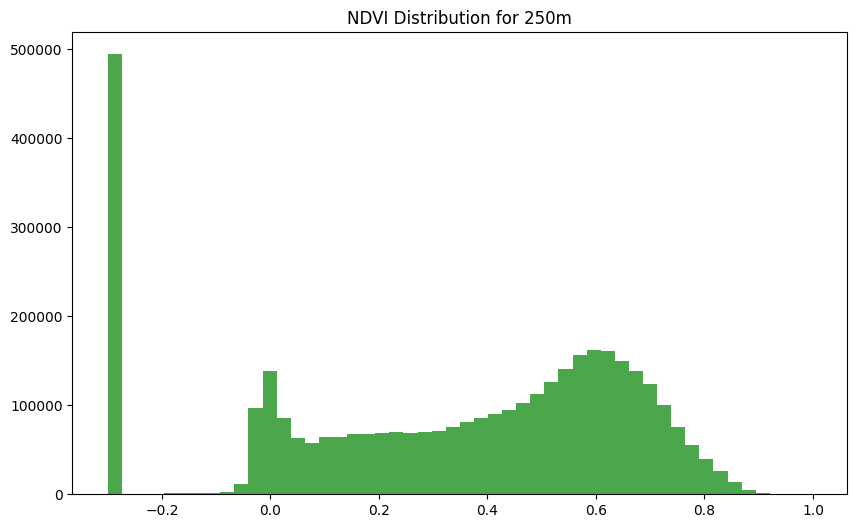

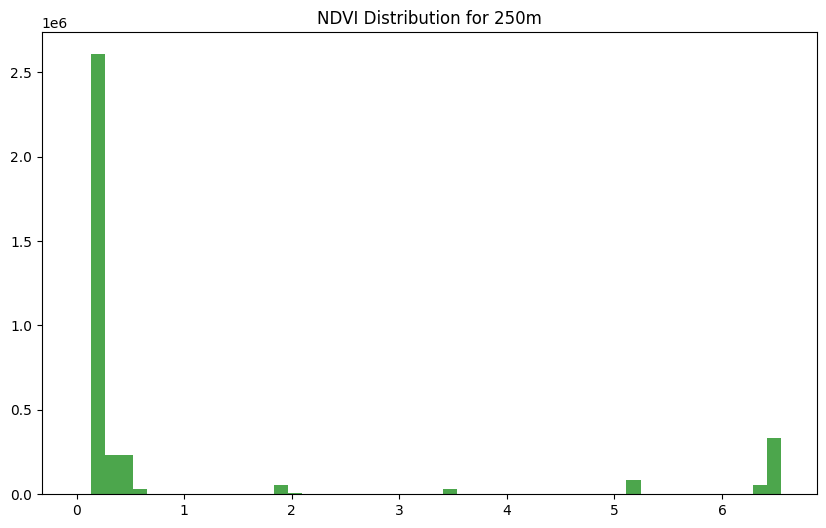

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Path to your NDVI TIFF files
ndvi_directory = "../data/ndvi/tiff"

# Get all NDVI TIFF files in the directory
ndvi_files = glob.glob(ndvi_directory + "/*.tif")

# Initialize lists to hold NDVI data and corresponding dates
ndvi_list = []
dates = []

# Load NDVI data from each file
scaling_factor = 10000.0  # Typical scaling factor for NDVI data

for ndvi_file in ndvi_files:
    with rasterio.open(ndvi_file) as src:
        ndvi_data = src.read(1)  # Read the first band (NDVI values)
        
        # Rescale the NDVI values
        ndvi_data_rescaled = ndvi_data / scaling_factor
        ndvi_list.append(ndvi_data_rescaled)
        
        # Extract date from the filename (assuming format includes date)
        date_str = ndvi_file.split('_')[2]  # Adjust as necessary based on your filename structure
        dates.append(date_str)

# Print the number of NDVI files found
print(f"Number of NDVI files found: {len(ndvi_files)}")

# Function to provide analysis based on the selected visualization
def get_analysis(visualization_type):
    if visualization_type == 'ndvi_250m':
        return "NDVI values for 250m resolution show the health of vegetation. Values above 0.6 indicate healthy vegetation, while values below 0.4 may indicate stress."
    
    elif visualization_type == 'ndvi_mean_over_time':
        mean_ndvi = np.nanmean([np.nanmean(ndvi) for ndvi in ndvi_list])
        return f"The mean NDVI over time is {mean_ndvi:.4f}. If the trend shows a downward slope, consider adjusting irrigation practices."
    
    elif visualization_type == 'ndvi_change_over_time':
        mean_ndvi_values = [np.nanmean(ndvi) for ndvi in ndvi_list]
        ndvi_changes = np.diff(mean_ndvi_values)
        return "This graph shows the change in NDVI over time. Significant drops may indicate crop stress, requiring early intervention."
    
    elif visualization_type == 'ndvi_change_250m':
        ndvi_change = ndvi_list[-1] - ndvi_list[0]  # Change in NDVI from first to last time period
        mean_change = np.nanmean(ndvi_change)
        return f"The mean change in NDVI between the first and last time periods is {mean_change:.4f}. This can indicate shifts in crop health."
    
    elif visualization_type == 'ndvi_histogram_1':
        return "The histogram for the first time period shows the distribution of NDVI values. Peaks may indicate areas of healthy vegetation."
    
    elif visualization_type == 'ndvi_histogram_last':
        return "The histogram for the last time period helps compare changes in NDVI distribution. Assess shifts in vegetation health."

# Example: Plot rescaled NDVI data for the first file
plt.figure(figsize=(10, 8))
plt.title(f"NDVI for {dates[0]}")
plt.imshow(ndvi_list[0], cmap='YlGn')  # Use imshow for visualization
plt.colorbar(label="NDVI Value")
plt.show()

# Calculate mean NDVI for each time period
mean_ndvi_values = [np.nanmean(ndvi) for ndvi in ndvi_list]

# Plot mean NDVI over time
plt.figure(figsize=(10, 6))
plt.plot(dates, mean_ndvi_values, marker='o', color='green', label="Mean NDVI")
plt.title('Mean NDVI Over Time')
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Further analysis: Identify periods of increasing or decreasing NDVI
# Optional: Calculate the change in NDVI over time
ndvi_changes = np.diff(mean_ndvi_values)

# Plot NDVI changes
plt.figure(figsize=(10, 6))
plt.plot(dates[1:], ndvi_changes, marker='o', color='orange', label="NDVI Change")
plt.title('Change in NDVI Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Mean NDVI')
plt.axhline(0, color='red', linestyle='--')  # Line indicating no change
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics for the entire NDVI dataset (rescaled)
overall_mean_ndvi = np.nanmean(mean_ndvi_values)
overall_std_ndvi = np.nanstd(mean_ndvi_values)

print(f"Overall Mean NDVI (rescaled): {overall_mean_ndvi:.4f}")
print(f"Overall Standard Deviation of NDVI (rescaled): {overall_std_ndvi:.4f}")

# Plot histogram of NDVI values for a specific time period (first file)
plt.figure(figsize=(10, 6))
plt.hist(ndvi_list[0].ravel(), bins=50, color='green', alpha=0.7)
plt.title(f"NDVI Distribution for {dates[0]}")
plt.xlabel("NDVI Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# If you want to plot histograms for all files, you can loop through the ndvi_list
for i, ndvi_data in enumerate(ndvi_list):
    plt.figure(figsize=(10, 6))
    plt.hist(ndvi_data.ravel(), bins=50, color='green', alpha=0.7)
    plt.title(f"NDVI Distribution for {dates[i]}")
    plt.xlabel("NDVI Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Compare NDVI between two specific dates (e.g., the first and last file)
ndvi_change = ndvi_list[-1] - ndvi_list[0]  # Change in NDVI from first to last time period

# Plot the change in NDVI
plt.figure(figsize=(10, 8))
plt.title(f"NDVI Change Between {dates[0]} and {dates[-1]}")
plt.imshow(ndvi_change, cmap='RdYlGn')  # Use a diverging colormap to show increase/decrease
plt.colorbar(label="Change in NDVI")
plt.show()

# Calculate the mean change
mean_ndvi_change = np.nanmean(ndvi_change)
print(f"Mean Change in NDVI between {dates[0]} and {dates[-1]}: {mean_ndvi_change:.4f}")

# Define the absolute path to the images directory
images_directory = 'C:\\Users\\disha\\nasa_space_app\\app\\static\\images\\'

# Save NDVI for 250m resolution
plt.figure(figsize=(10, 8))
plt.imshow(ndvi_list[0], cmap='YlGn')
plt.colorbar(label="NDVI Value")
plt.title("NDVI for 250m Resolution")
plt.savefig(os.path.join(images_directory, 'ndvi_250m.png'))  # Save image
plt.show()

# Save Mean NDVI Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates, mean_ndvi_values, marker='o', color='green', label="Mean NDVI")
plt.title('Mean NDVI Over Time')
plt.savefig(os.path.join(images_directory, 'ndvi_mean_over_time.png'))
plt.show()

# Save Change in NDVI Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates[1:], ndvi_changes, marker='o', color='orange', label="NDVI Change")
plt.title('Change in NDVI Over Time')
plt.savefig(os.path.join(images_directory, 'ndvi_change_over_time.png'))
plt.show()

# Save Mean Change in NDVI Between Two Time Periods
plt.figure(figsize=(10, 8))
plt.imshow(ndvi_change, cmap='RdYlGn')
plt.colorbar(label="Change in NDVI")
plt.title(f"Mean Change in NDVI between {dates[0]} and {dates[-1]}")
plt.savefig(os.path.join(images_directory, 'ndvi_change_250m.png'))
plt.show()

# Save Histograms (first and last time periods)
plt.figure(figsize=(10, 6))
plt.hist(ndvi_list[0].ravel(), bins=50, color='green', alpha=0.7)
plt.title(f"NDVI Distribution for {dates[0]}")
plt.savefig(os.path.join(images_directory, 'ndvi_histogram_1.png'))
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(ndvi_list[-1].ravel(), bins=50, color='green', alpha=0.7)
plt.title(f"NDVI Distribution for {dates[-1]}")
plt.savefig(os.path.join(images_directory, 'ndvi_histogram_last.png'))
plt.show()
